In [89]:
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [120]:
target = pd.read_csv('../input/train.csv.zip',usecols=['target'],squeeze=True)

In [122]:
lgb_valid = pd.read_csv("valid-lgb-baseline.csv")
nn_valid = pd.read_csv("valid-nn-baseline.csv")

In [123]:
lgb_test = pd.read_csv("submit-lgb-baseline.csv")
nn_test = pd.read_csv("submit-nn-baseline.csv")

In [124]:
X_valid = np.hstack( [lgb_valid[["target"]], nn_valid[["target"]]] )
X_test = np.hstack( [lgb_test[["target"]], nn_test[["target"]]] )


In [125]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_valid, target)

lr.coef_

array([0.90558683, 0.7400604 ])

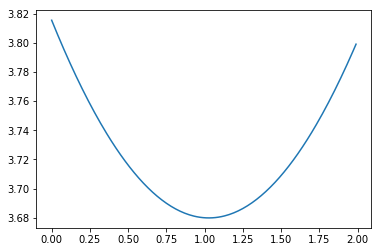

In [126]:
coeff = []
err = []

for ip in range(200):
    icoeff = ip*0.01
    icoeffs = np.array([icoeff,1.-icoeff]).reshape(1,2)
    ipred = (X_valid*icoeffs).sum(axis=1)
    coeff.append(icoeff)
    err.append( np.sqrt(((ipred-target)**2).mean()) )

plt.plot(coeff,err)

In [127]:
np.array(err).argmin(), min(err)

(103, 3.6799353151762513)

In [128]:
predict = lr.predict(X_valid)

In [129]:
np.sqrt( ((predict-target)**2).mean() )

3.6782140794146505

In [130]:
(lgb_valid["target"]-target).std()

3.6800435193397893

In [131]:
(nn_valid["target"]-target).std()

3.7945152575145014

In [132]:
submit = lr.predict(X_test)

In [133]:
submit_df = pd.DataFrame({"card_id":nn_test["card_id"], "target":submit})

In [134]:
submit_df.to_csv("submit-lr.csv",index=False)

In [135]:
predict[:10]

array([-0.22780579, -0.18345421,  0.49869023,  0.18845798, -0.04158277,
       -1.3429036 , -0.14843661,  0.39362391,  0.46347314,  0.29909649])

In [136]:
target[:10]

0   -0.820283
1    0.392913
2    0.688056
3    0.142495
4   -0.159749
5    0.871585
6    0.230129
7    2.135850
8   -0.065406
9    0.300062
Name: target, dtype: float64